In [6]:
''' We'll use this notebook to train a model to determine if a person with given Gender(0-Male, 1-Female), Age(in yrs), 
Sleep Duration(in hrs), Quality of Sleep(1-10), Physical Activity(1-100), Stress Level(1-10), 
BMI Category(0-Normal, 1-Normal Weight, 2-Obese & 3-Overweight), Blood Pressure, Heart Rate 
and Daily no. of steps is suffering from any sleep disorder(0-None, 1-Sleep Apnea, 2-Insomnia).'''

# Let's start by loading our dataset. We'll need Pandas to load our dataset
import pandas as pd

df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv') #Stored as a Pandas' dataframe. 

In [2]:
# Let's explore the dataset a bit.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    int64  
 2   Age                      374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Blood Pressure High      374 non-null    int64  
 9   Blood Pressure Low       374 non-null    int64  
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 38.1 KB


In [3]:
# Info function returns all the columns in the dataset with the count of non-null values in each column and the type of data in each column.
df.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure High,Blood Pressure Low,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,27,6.1,6,42,6,3,126,83,77,4200,0
1,2,0,28,6.2,6,60,8,0,125,80,75,10000,0
2,3,0,28,6.2,6,60,8,0,125,80,75,10000,0
3,4,0,28,5.9,4,30,8,2,140,90,85,3000,1
4,5,0,28,5.9,4,30,8,2,140,90,85,3000,1


In [4]:
# head() returns the first 5 rows in a dataset.
print(df) # Will return our entire dataframe.

     Person ID  Gender  Age  Sleep Duration  Quality of Sleep  \
0            1       0   27             6.1                 6   
1            2       0   28             6.2                 6   
2            3       0   28             6.2                 6   
3            4       0   28             5.9                 4   
4            5       0   28             5.9                 4   
..         ...     ...  ...             ...               ...   
369        370       1   59             8.1                 9   
370        371       1   59             8.0                 9   
371        372       1   59             8.1                 9   
372        373       1   59             8.1                 9   
373        374       1   59             8.1                 9   

     Physical Activity Level  Stress Level  BMI Category  Blood Pressure High  \
0                         42             6             3                  126   
1                         60             8             0 

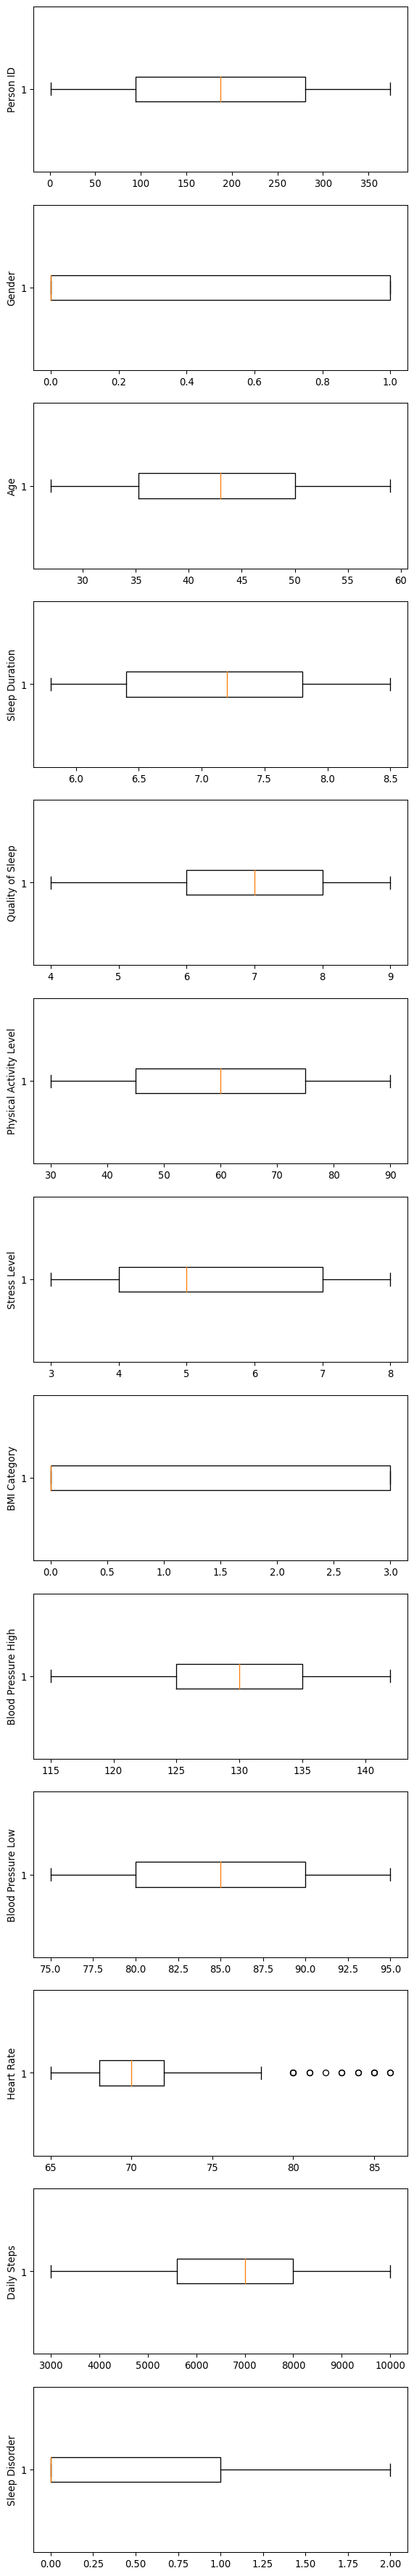

In [5]:
# Our dataset consists of 374 rows and 13 columns.
# Now, let's get started with data preprocessing.
# We'll use matplotlib to showcase outliers in each column.
import matplotlib.pyplot as plt

fig, axis = plt.subplots(13, 1, dpi=95, figsize=(7,49)) #Since 13 plots will be drawn at a time. dpi is the no. of pixels for the subplot. figsize represents size of the plot in inches.
i = 0

for col in df.columns:
    axis[i].boxplot(df[col], vert=False) # used to create summary of the dataframe.
    axis[i].set_ylabel(col) # Set label to the y-axis
    i += 1
    
plt.show() # Print the figures

In [8]:
# As can be seen from the above figures, only heart rates has outliers.
# Let's remove the outliers.
# We'll need to import numpy.
import numpy as np

q1, q3 = np.percentile(df['Heart Rate'], [25, 75]) # quartiles
iqr = q3 - q1 # Interquartile range
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Drop the outliers.
data = df[(df['Heart Rate'] >= lower_bound) & (df['Heart Rate'] <= upper_bound)]

In [9]:
print(data)

     Person ID  Gender  Age  Sleep Duration  Quality of Sleep  \
0            1       0   27             6.1                 6   
1            2       0   28             6.2                 6   
2            3       0   28             6.2                 6   
7            8       0   29             7.8                 7   
8            9       0   29             7.8                 7   
..         ...     ...  ...             ...               ...   
369        370       1   59             8.1                 9   
370        371       1   59             8.0                 9   
371        372       1   59             8.1                 9   
372        373       1   59             8.1                 9   
373        374       1   59             8.1                 9   

     Physical Activity Level  Stress Level  BMI Category  Blood Pressure High  \
0                         42             6             3                  126   
1                         60             8             0 

In [10]:
# Now our data has just 359 rows. The extreme values have been removed from our dataset.
# Now let's check the correlation.
corr = data.corr()

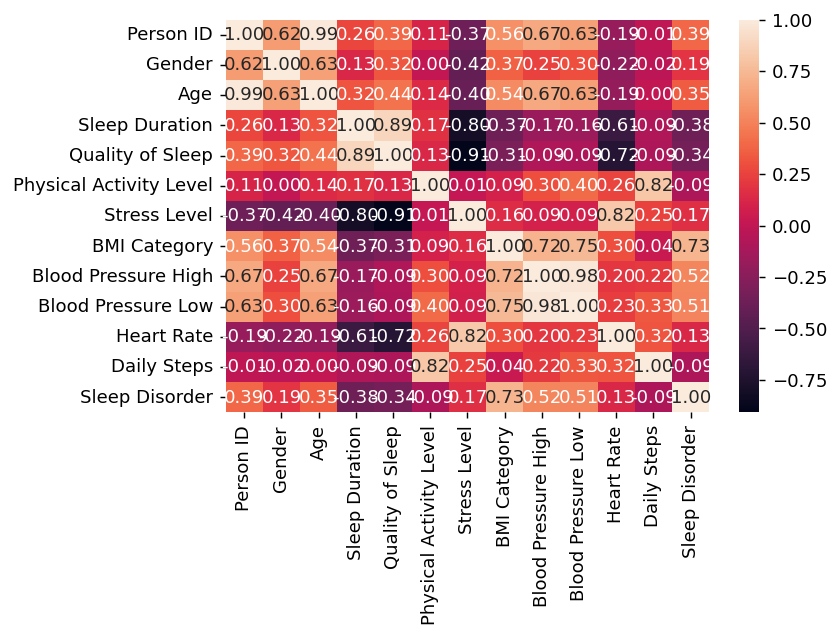

In [17]:
# Let's see the heatmap
import seaborn as sns
plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

# We can also use a scatter plot. Since we have several dependent variables, I preferred not to use a scatter plot.

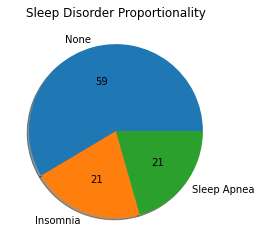

In [12]:
# The above heatmap has the color labels associated with the actual figure. Brighter colors show more common occurrance.
# The above heatmap can help us analyze how different columns are correlated with each other.
# Now let's plot a pie chart to find the proportion of sleep disorders.
corr['Sleep Disorder'].sort_values(ascending = False)
plt.pie(df['Sleep Disorder'].value_counts(),
        labels= ['None', 'Insomnia', 'Sleep Apnea'],
        autopct='%.f', shadow=True)
plt.title('Sleep Disorder Proportionality')
plt.show()

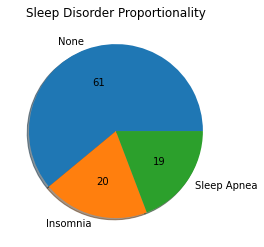

In [13]:
# The above pie chart is for unclean data. Let's repeat the same process for cleaned data.
plt.pie(data['Sleep Disorder'].value_counts(),
        labels= ['None', 'Insomnia', 'Sleep Apnea'],
        autopct='%.f', shadow=True)
plt.title('Sleep Disorder Proportionality')
plt.show()

In [14]:
# About 39% of surveyed people are suffering from some kind of sleep disorder! Woah!
# Now let's separate the data into input and output components.
X = data.drop(columns =['Sleep Disorder'])
Y = data['Sleep Disorder']

In [19]:
# Our preprocessing of data is complete now. Since the given values are pretty much standardized, we need not do normalization and standardization.
# Let's now segregate our dataset into training and testing datasets. We'll use 25% of the data for testing and rest for training.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, data['Sleep Disorder'], test_size=0.25)

# If needed, the data can be split for cross-validation as well. KFold function in sklearn module can help in dividing the data into cross-validation sets.

In [20]:
# Let's proceed with training our model. We'll be using Linear Regression to train our model.
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [21]:
# Now our model has been trained. 
# Let's evaluate our model now.
from sklearn.metrics import mean_squared_error

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred) # Lower the MSE, better the model has been trained.
print(mse)

2.0891226269217836e-27


In [23]:
# Great! Now let's save our model for future use using pickle.
import pickle
filename = 'sleep_disorder_prediction_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [24]:
# Voila! We're done with our assessment part I.